<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries :

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Q1_A :

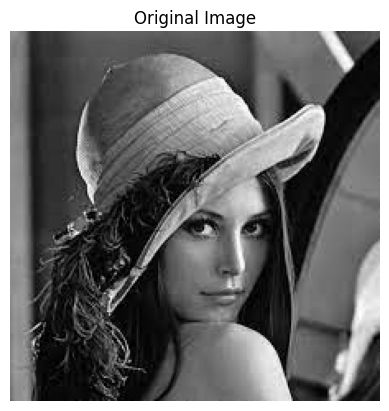


Result of filtering using ILPFs with cutoff frequency set at D0 values: 10, 30, 60, 160.



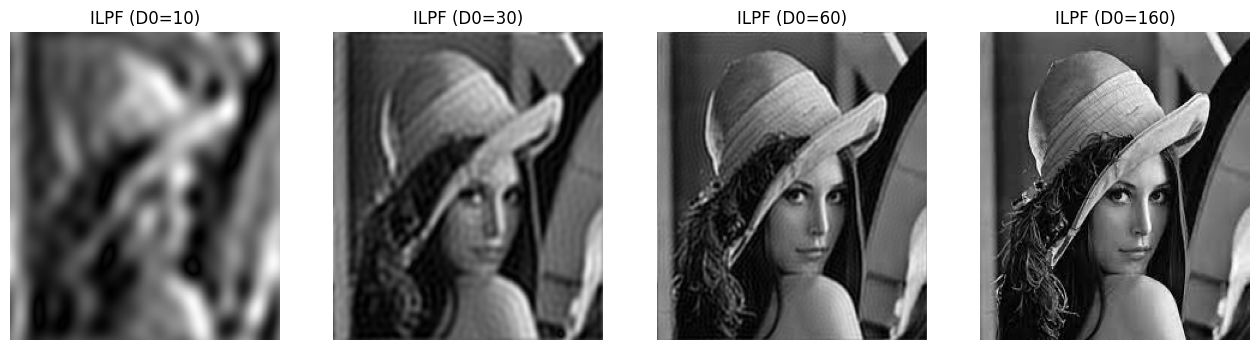

In [69]:
#Read image
img = cv2.imread("drive/MyDrive/DIP_EXC3/Q1/lena.jpg", 0)

def ideal_lowPass_filter(image, D0):

    # Fourier transform on the image
    fft = np.fft.fft2(image)
    fftShift = np.fft.fftshift(fft)
    
    # Create an ideal lowPass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    
    # Generate circular mask
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= D0:
                mask[i, j] = 1
    
    # Apply the filter to the image in the frequency domain
    fftShift_filter = fftShift * mask
    
    # Inverse Fourier Transform
    ifft_shift = np.fft.ifftshift(fftShift_filter)
    filtered_img = np.fft.ifft2(ifft_shift)
    filtered_img = np.abs(filtered_img)
    
    return filtered_img

# Show the Original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()
print("\nResult of filtering using ILPFs with cutoff frequency set at D0 values: 10, 30, 60, 160.\n")

# Define the cutoff frequency (D0)
D0_values = [10, 30, 60, 160]


f, ax = plt.subplots(1, len(D0_values), figsize=(16, 4))

for i, D0 in enumerate(D0_values):

    # Apply the ideal lowPass filter
    filtered_img = ideal_lowPass_filter(img, D0)
    
    # Show the Filtered image
    ax[i].imshow(filtered_img, cmap='gray', aspect='auto')
    ax[i].set_title(f"ILPF (D0={D0})")
    ax[i].axis('off')
    
plt.show()

### Q1_B :

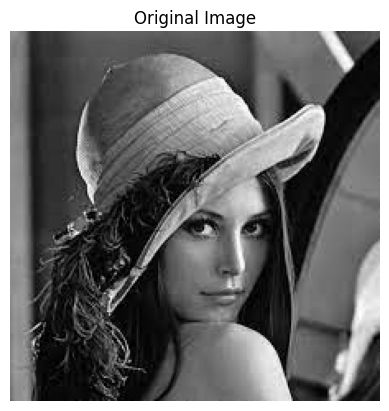


Result of filtering using BLPFs with cutoff frequency set at n=1 & D0 values: 10, 30, 60, 160.



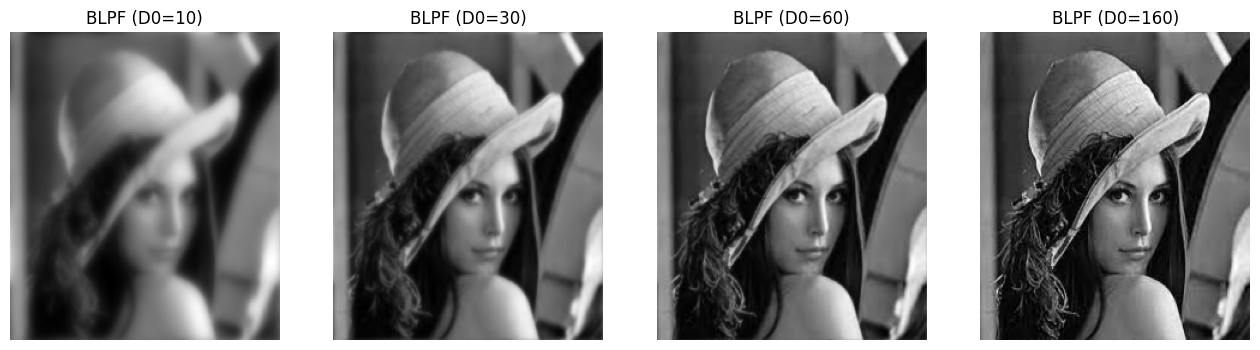

In [70]:
def butterworth_lowPass_filter(image, D0, n):

    # Fourier transform on the image
    fft = np.fft.fft2(img)
    fftShift = np.fft.fftshift(fft)

    # Create a Butterworth lowPass filter mask
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols))

    # Generate circular mask
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = 1 / (1 + (distance / D0) ** (2 * n))

    # Apply the filter to the image in the frequency domain
    fftShift_filter = fftShift * mask

    # Inverse Fourier Transform
    ifft_shift = np.fft.ifftshift(fftShift_filter)
    filtered_img = np.fft.ifft2(ifft_shift)
    filtered_img = np.abs(filtered_img)
    
    return filtered_img

# Show the Original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()
print("\nResult of filtering using BLPFs with cutoff frequency set at n=1 & D0 values: 10, 30, 60, 160.\n")

# Define the cutoff frequency (D0)
D0_values = [10, 30, 60, 160]


f, ax = plt.subplots(1, len(D0_values), figsize=(16, 4))

for i, D0 in enumerate(D0_values):

    # Apply the Butterworth lowPass filter
    filtered_img = butterworth_lowPass_filter(img, D0, n=1)
    
    # Show the Filtered image
    ax[i].imshow(filtered_img, cmap='gray', aspect='auto')
    ax[i].set_title(f"BLPF (D0={D0})")
    ax[i].axis('off')

plt.show()


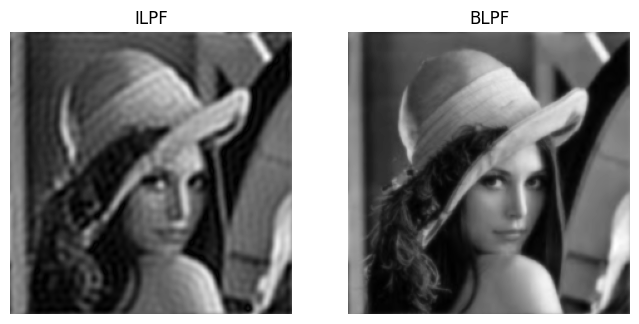

In [71]:
# Show the ILPF and BLPF images
f, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(ideal_lowPass_filter(img, 30), cmap='gray')
ax[0].set_title("ILPF")
ax[0].axis('off')
ax[1].imshow(butterworth_lowPass_filter(img, 30, n=1), cmap='gray')
ax[1].set_title("BLPF")
ax[1].axis('off')
plt.show()

**Conclusion**: The comparison between ILPF and BLPF with the same D0 size shows the ringing property in the ideal filter. 